# 1D simulation

2D simulation:
Xn - Xn-1 = D(Xn-1, Yn-1)F(Xn-1, Yn-1)dt - (2Ddt)^1/2 N(0,1)

drift term = D(r)F(r)* dt

diffusion term = np.sqrt(2Ddt)* noise

base line of diffusion coeffienct outside synaptic region is 1, lowest diffusion coeffienct is 0.5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10) #make graph larger

In [2]:
#def different well Dx and Fx
#Vx should have same shape with Dx, but it should multiply for a constant, e.g. 3 in trap well

# triangle well
def DiffCoef_Tri(x):
    if np.absolute(x) >= 2:
        D = 1
    elif 2 > np.absolute(x) and np.absolute(x) > 0:
        D = np.absolute(x)/4 + 0.5 #base on graph plotting
    else:
        D = 0.5
    return D
def Force_Tri(x):
    if np.absolute(x) < 2:
        f = (-np.sign(x) * 0.25) * 3
    else:
        f = 0
    return f

#trapezium well
def DiffCoef_Trap(x):
    x = (x+L)%(2*L) - L
    if np.absolute(x) >= 2:
        D = 1
    elif 2 > np.absolute(x) and np.absolute(x) >= 1:
        D = np.absolute(x) * 0.5
    else:
        D = 0.5
    return D
def Force_Trap(x):
    if 2 > np.absolute(x) and np.absolute(x) >= 1:   # 3 or 2 times d D(x)
        f = (-np.sign(x) * 0.5) * 3 #3 is the multiple coef for fx compared with dx (from experiment data)
    else:
        f = 0
    return f

# parabala well                        have some problem, the reuslt of mean is not 0
def DiffCoef_Para(x):
    if np.absolute(x) >= a:
        D = D_out
    elif a > np.absolute(x):
        D = (D_out - D_in) * (x**2)/(a**2) + D_in
    return D
def Potential_Para(x):
    if np.absolute(x) >= a:
        V = V_out
    elif a > np.absolute(x):
        V = (V_out - V_in) * (x**2)/(a**2) + V_in
    return V
def Force_Para(x):
    if a > np.absolute(x):
        f = -(V_out - V_in) * (2*x)/(a**2)
    else:
        f = 0
    return f

#no synaptic region
def DiffCoef_None(x):
    D = 1
    return D
def Force_None(x):
    f = 0
    return f

# semi-cicle well                    should not work
'''
def DiffCoef_Semi(x):
    if 2 > np.absolute(x):
        D = 2 - (4.0 - x**2.0)**0.5 + 0.5
    else:
        D = 0.5
    return D
def Force_Semi(x):                   #should be d of vx not dx
    if 2 > np.absolute(x):
        f = x/((4-x**2)**0.5)
    else:
        f = 0
    return f
'''

def bound(x2, wall):  #assume the particle would bounce one times only
    x = x2 - (np.sign(x2) * wall)
    x2 = np.sign(x2) * wall - x
    return x2


In [3]:
D_out = 1
D_in = 0.5
V_out = 0
V_in = -3
a = 2
L = 5

t_0 = 0
t_end = 20
length = 1000
test_number = 50
wall = 5.5
hist_range = 50

In [4]:
t = np.linspace(t_0, t_end, length)
dt = np.mean (np.diff(t))
x_Tri = np.zeros((test_number, length))
x_Trap = np.zeros((test_number, length))
x_Para = np.zeros((test_number, length))
x_None = np.zeros((test_number, length))
for j in range(test_number,0):
    x_Tri[0,j] = np.random.normal(loc = 0.0, scale = 1.0)
    x_Trap[0,j] = x_Tri[0,j]
    x_Para[0,j] = x_Tri[0,j]
    x_None[0,j] = x_Tri[0,j]

In [5]:
noise = np.random.normal(loc = 0.0, scale = 1.0, size = (test_number, length))*np.sqrt(dt)

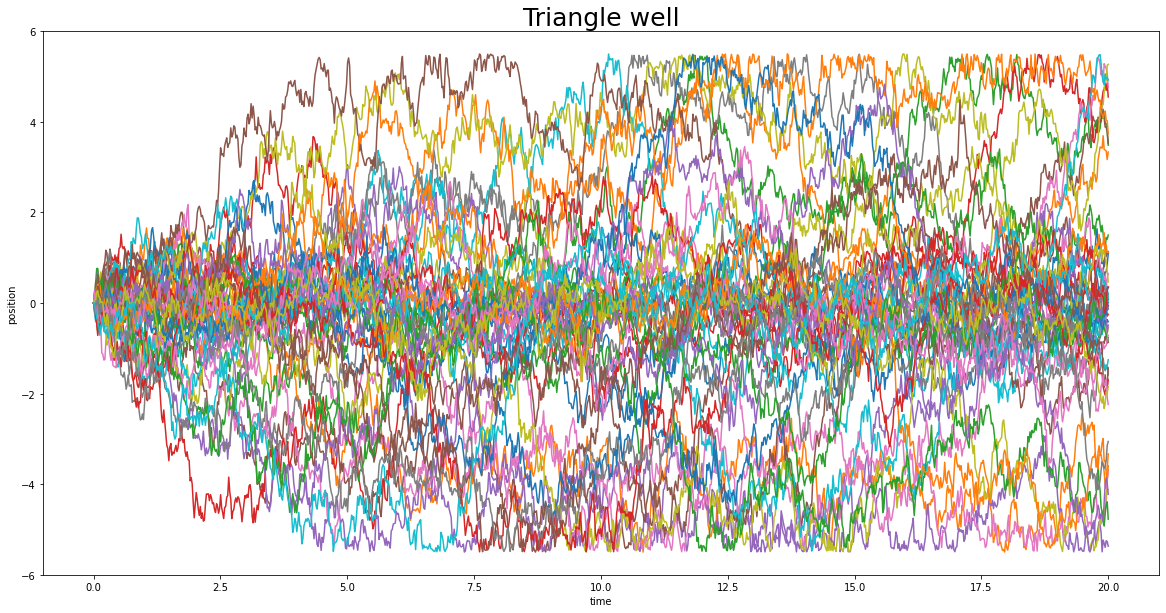

In [6]:
for i in range(0, test_number):
    for j in range (1,length): 
        x_Tri[i,j] =x_Tri[i,j-1] + DiffCoef_Tri(x_Tri[i,j-1]) * Force_Tri(x_Tri[i,j-1]) * dt + \
        np.sqrt(2.0 * DiffCoef_Tri(x_Tri[i,j-1])) * noise[i,j]
        if np.absolute(x_Tri[i,j]) > wall:
            x_Tri[i,j] = bound(x_Tri[i, j], wall)
for i in range(test_number):
    plt.title("Triangle well", fontsize = 25)
    plt.plot(t,x_Tri[i])
    plt.ylim(-6, 6)
    plt.xlabel("time")
    plt.ylabel("position")

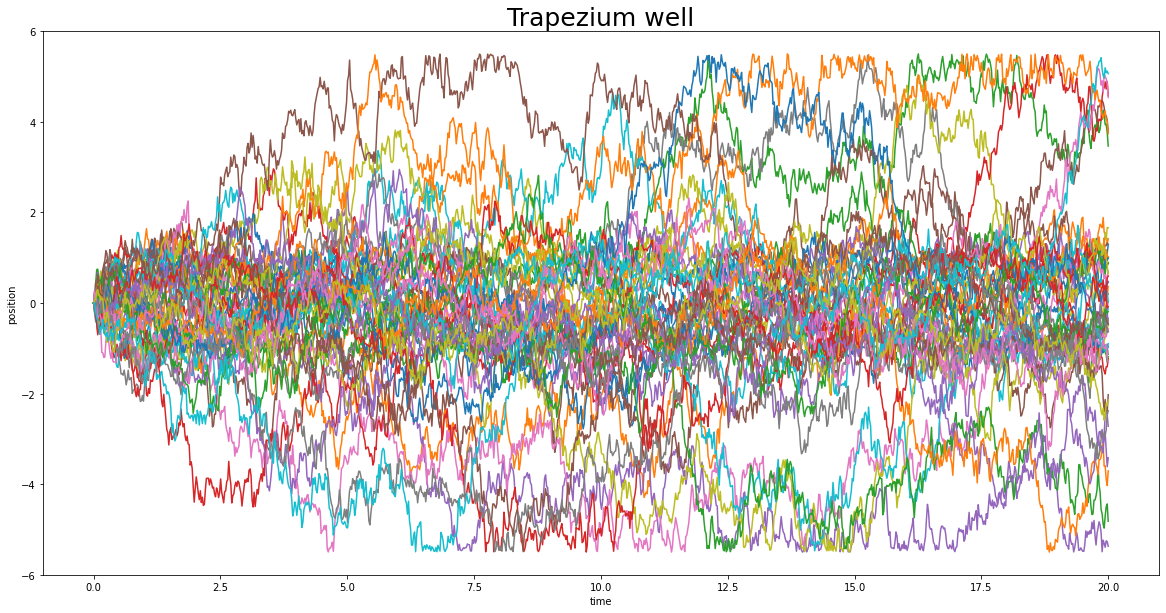

In [7]:
for i in range(0, test_number):
    for j in range (1,length): 
        x_Trap[i,j] =x_Trap[i,j-1] + DiffCoef_Trap(x_Trap[i,j-1]) * Force_Trap(x_Trap[i,j-1]) * dt + \
        np.sqrt(2.0 * DiffCoef_Trap(x_Trap[i,j-1])) * noise[i,j]
        if np.absolute(x_Trap[i,j]) > wall:
            x_Trap[i,j] = bound(x_Trap[i, j], wall)
for i in range(test_number):
    plt.title("Trapezium well", fontsize = 25)
    plt.plot(t,x_Trap[i])
    plt.ylim(-6, 6)
    plt.xlabel("time")
    plt.ylabel("position")

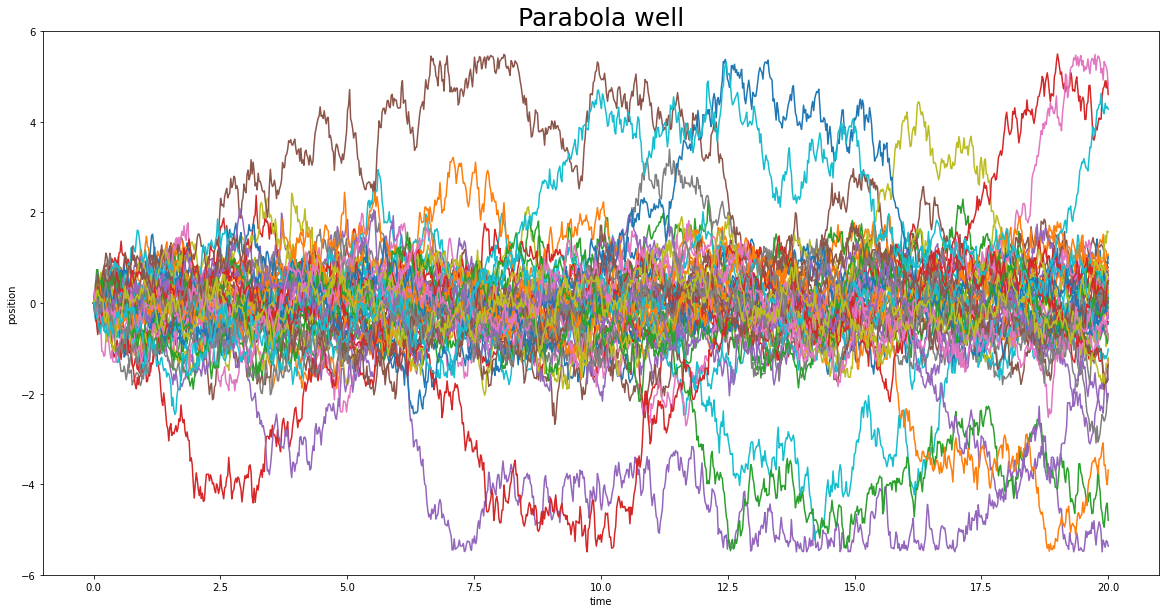

In [8]:
for i in range(0, test_number):
    for j in range (1,length): 
        x_Para[i,j] =x_Para[i,j-1] + DiffCoef_Para(x_Para[i,j-1]) * Force_Para(x_Para[i,j-1]) * dt + \
        np.sqrt(2.0 * DiffCoef_Para(x_Para[i,j-1])) * noise[i,j]
        if np.absolute(x_Para[i,j]) > wall:
            x_Para[i,j] = bound(x_Para[i, j], wall)
for i in range(test_number):
    plt.title("Parabola well", fontsize = 25)
    plt.plot(t,x_Para[i])
    plt.ylim(-6, 6)
    plt.xlabel("time")
    plt.ylabel("position")

In [9]:
'''
for i in range(0, test_number):
    for j in range (1,length): 
        x_None[i,j] =x_None[i,j-1] + DiffCoef_None(x_Para[i,j-1]) * Force_None(x_Para[i,j-1]) * dt + \
        np.sqrt(2.0 * DiffCoef_None(x_None[i,j-1])) * noise[i,j]
        if np.absolute(x_None[i,j]) > wall:
            x_None[i,j] = bound(x_None[i, j], wall)
for i in range(test_number):
    plt.title("None", fontsize = 25)
    plt.plot(t,x_Para[i])
    plt.ylim(-6, 6)
    '''

'\nfor i in range(0, test_number):\n    for j in range (1,length): \n        x_None[i,j] =x_None[i,j-1] + DiffCoef_None(x_Para[i,j-1]) * Force_None(x_Para[i,j-1]) * dt +         np.sqrt(2.0 * DiffCoef_None(x_None[i,j-1])) * noise[i,j]\n        if np.absolute(x_None[i,j]) > wall:\n            x_None[i,j] = bound(x_None[i, j], wall)\nfor i in range(test_number):\n    plt.title("None", fontsize = 25)\n    plt.plot(t,x_Para[i])\n    plt.ylim(-6, 6)\n    '

### mean

In [10]:
# measure the concentration of particle and distribution of particle
# 2000 time point for 20second, 1 second = 100t

x_Tri_mean = np.zeros((1, 1000))
x_Trap_mean = np.zeros((1, 1000))
x_Para_mean = np.zeros((1, 1000))
x_None_mean = np.zeros((1, 1000))
for i in range(length):
    x_Tri_mean[0,i] = x_Tri[:, i].mean()
    x_Trap_mean[0,i] = x_Trap[:, i].mean()
    x_Para_mean[0,i] = x_Para[:, i].mean()
    x_None_mean[0,i] = x_None[:, i].mean()

(-5.5, 5.5)

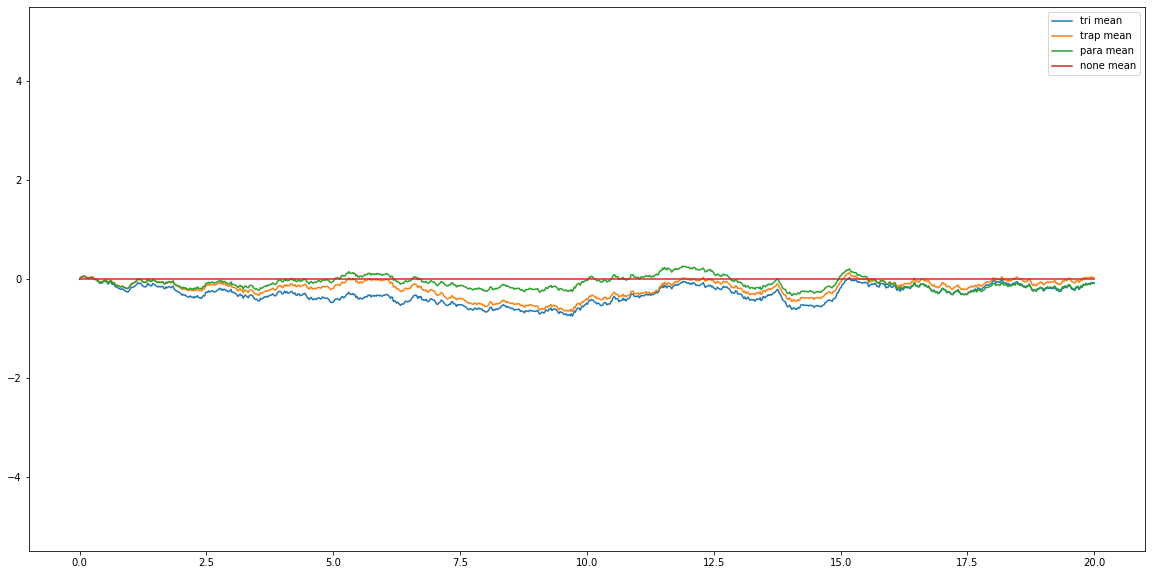

In [11]:
plt.plot(t, x_Tri_mean[0,:], label = "tri mean")
plt.plot(t, x_Trap_mean[0,:], label = "trap mean")
plt.plot(t, x_Para_mean[0,:], label = "para mean")
plt.plot(t, x_None_mean[0,:], label = "none mean")
plt.legend()
plt.ylim(-5.5, 5.5)

<ipython-input-12-16cc9d5d7f09>:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  plt.hist(np.hstack((x_Para[:,0 + i] for i in range(hist_range))), bins = 20, density = True)


'\nfig2, axes = plt.subplots(nrows=4, ncols=7)\nfor i, ax in enumerate(axes.flatten()):\n    df[df.columns[i]].plot(color=colors[i], ax=ax)\n    ax.set_title(df.columns[i])\n'

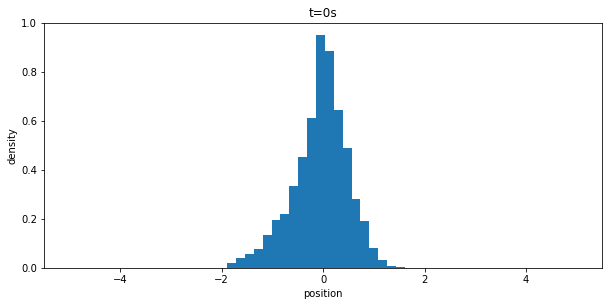

In [12]:
plt.rcParams["figure.figsize"] = (10,4.5)

plt.hist(np.hstack((x_Para[:,0 + i] for i in range(hist_range))), bins = 20, density = True)
plt.xlim(-wall, wall)
plt.ylim(0, 1)
plt.title("t=0s")
plt.xlabel("position")
plt.ylabel("density")

'''
fig2, axes = plt.subplots(nrows=4, ncols=7)
for i, ax in enumerate(axes.flatten()):
    df[df.columns[i]].plot(color=colors[i], ax=ax)
    ax.set_title(df.columns[i])
'''

<ipython-input-13-d3142d6a41ef>:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  plt.hist(np.hstack((x_Para[:,250 + i] for i in range(hist_range))), bins = 20, density = True)


Text(0, 0.5, 'density')

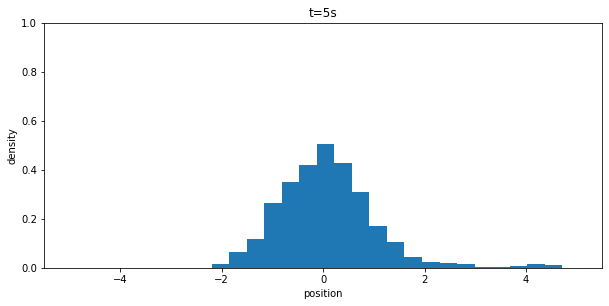

In [13]:
plt.hist(np.hstack((x_Para[:,250 + i] for i in range(hist_range))), bins = 20, density = True)
plt.xlim(-wall, wall)
plt.ylim(0, 1)
plt.title("t=5s")
plt.xlabel("position")
plt.ylabel("density")

<ipython-input-14-3cbffe96aae8>:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  plt.hist(np.hstack((x_Para[:,500 + i] for i in range(hist_range))), bins = 20, density = True)


Text(0, 0.5, 'density')

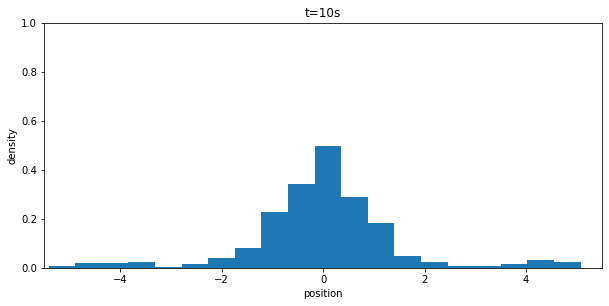

In [14]:
plt.hist(np.hstack((x_Para[:,500 + i] for i in range(hist_range))), bins = 20, density = True)
plt.xlim(-wall, wall)
plt.ylim(0, 1)
plt.title("t=10s")
plt.xlabel("position")
plt.ylabel("density")

<ipython-input-15-6e9af1f242a6>:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  plt.hist(np.hstack((x_Trap[:,750 + i] for i in range(hist_range))), bins = 20, density = True)


Text(0, 0.5, 'density')

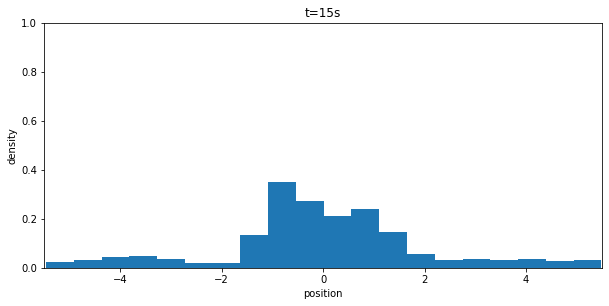

In [15]:
plt.hist(np.hstack((x_Trap[:,750 + i] for i in range(hist_range))), bins = 20, density = True)
plt.xlim(-wall, wall)
plt.ylim(0, 1)
plt.title("t=15s")
plt.xlabel("position")
plt.ylabel("density")

<ipython-input-16-db22200894f9>:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  plt.hist(np.hstack((x_Trap[:,999 - hist_range + i] for i in range(hist_range))), bins = 20, density = True)


Text(0, 0.5, 'density')

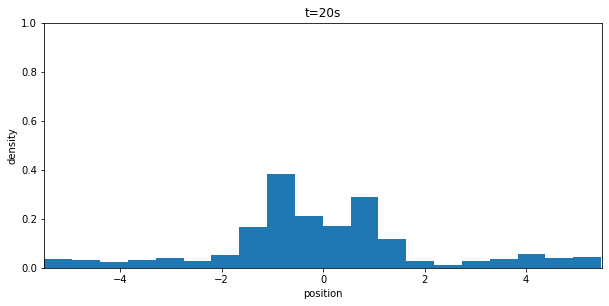

In [16]:
plt.hist(np.hstack((x_Trap[:,999 - hist_range + i] for i in range(hist_range))), bins = 20, density = True)
plt.xlim(-wall, wall)
plt.ylim(0, 1)
plt.title("t=20s")
plt.xlabel("position")
plt.ylabel("density")